In [1]:
import cv2
import mediapipe as mp
import numpy as np

In [3]:
mp_drawing= mp.solutions.drawing_utils
mp_pose= mp.solutions.pose
mp_drawing_styles = mp.solutions.drawing_styles

In [7]:
cap = cv2.VideoCapture(0)
#Mediapipe Instance:
with mp_pose.Pose(min_tracking_confidence=0.5,min_detection_confidence=0.5) as pose:
    while cap.isOpened():
        ret, image = cap.read()
        image.flags.writeable = False
        # Recolor image to RGB:
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        # Processing the image:
        results= pose.process(image)
        # Draw the pose annotation on the image.
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_pose.POSE_CONNECTIONS,
                                  landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style()) 
        # Flip the image horizontally for a selfie-view display.
        cv2.imshow('Pose Estimation', cv2.flip(image, 1))
        #Press esc key on keyboard to exit:
        if cv2.waitKey(5) & 0xFF == 27:
            break
cap.release()
cv2.destroyAllWindows()

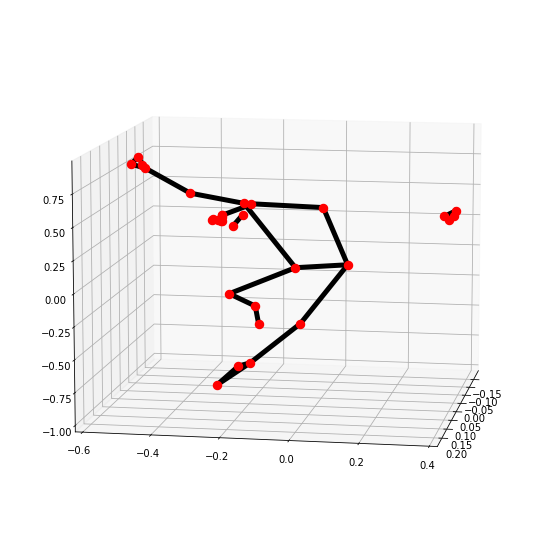

In [17]:
# For static images:
IMAGE_FILES = ["fc7874ac6433ecee575a6500298dd728.png"] #Test with an image
BG_COLOR = (192, 192, 192) # gray
with mp_pose.Pose(static_image_mode=True,model_complexity=2,enable_segmentation=True,min_detection_confidence=0.5) as pose:
    for idx, file in enumerate(IMAGE_FILES):
        image = cv2.imread(file)
        image_height, image_width, _ = image.shape
        # Convert the BGR image to RGB before processing.
        results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        if not results.pose_landmarks:
            continue
        annotated_image = image.copy()
        # Draw segmentation on the image.
        # To improve segmentation around boundaries, consider applying a joint
        # bilateral filter to "results.segmentation_mask" with "image".
        condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
        bg_image = np.zeros(image.shape, dtype=np.uint8)
        bg_image[:] = BG_COLOR
        annotated_image = np.where(condition, annotated_image, bg_image)
        # Draw pose landmarks on the image.
        mp_drawing.draw_landmarks(annotated_image,results.pose_landmarks,mp_pose.POSE_CONNECTIONS,
                                  landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
        cv2.imwrite('annotated_image' + str(idx) + '.png', annotated_image)
        cv2.imshow('Pose Estimation',annotated_image)
        #Press esc key on keyboard to exit:
        if cv2.waitKey(5) & 0xFF == 27:
            break
        # Plot pose world landmarks.
        mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)